## REINFORCEMENT LEARNING - CIA 1
DHEV MUGUNDDHAN A - (21011101040)

In [3]:
### dependencies
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
class NewsMaximizer:
    def __init__(self, n_actions=5, epsilon=0.2, time_steps=1000):
        self.n_actions = n_actions  # Number of strategies
        self.epsilon = epsilon  # Exploration rate
        self.time_steps = time_steps  # Time steps for the simulation
        self.q_values = np.zeros(n_actions)  # Estimated value of each action
        self.action_counts = np.zeros(n_actions)  # Counts of each action
        self.aligned_mean = [300, 450, 100, 550, 800]  # This is chosen before hand that a particular action results in the resultant aligned_articles view count
        self.non_aligned_mean = [400, 150, 500, 100, 80]  # This gives the non_aligned articles view count
        # so in the above assumption we are choosing the index 4 action is the best one
        self.std_dev = 50  # Standard deviation for normal distribution
        self.q_value_history = np.zeros((time_steps, n_actions))  # To track Q-value updation

    def get_reward(self, action):
        # Generate viewer counts for aligned and non-aligned articles based on normal distributions
        aligned_viewers = np.random.normal(self.aligned_mean[action], self.std_dev)
        non_aligned_viewers = np.random.normal(self.non_aligned_mean[action], self.std_dev)
        
        # Reward function: 2 * aligned_viewers - non_aligned_viewers
        reward = (2 * aligned_viewers) - non_aligned_viewers
        return reward

    def select_action(self):
        # Epsilon-greedy strategy: explore with probability epsilon, otherwise exploit
        if random.random() < self.epsilon:
            return random.randint(0, self.n_actions - 1)  
        else:
            return np.argmax(self.q_values)  

    def update_estimates(self, action, reward):
        # Update the count for the selected action
        self.action_counts[action] += 1
        
        # Incremental update of the Q-value estimate using sample-average method
        self.q_values[action] += (1 / self.action_counts[action]) * (reward - self.q_values[action])

    def train(self):
        rewards = []
        for t in range(self.time_steps):
            action = self.select_action()
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
            rewards.append(reward)
            
            self.q_value_history[t] = self.q_values.copy()
        
        return rewards

    def plot_learning_curve(self):
        plt.figure(figsize=(10, 6))
        for action in range(self.n_actions):
            plt.plot(self.q_value_history[:, action], label=f'Action {action}')
        
        plt.title("Learning Curve: Q*(a) Values Over Time")
        plt.xlabel("Time Steps (Epochs)")
        plt.ylabel("Estimated Reward (Q*(a))")
        plt.legend()
        plt.grid(True)
        plt.show()

    def get_best_action(self):
        return np.argmax(self.q_values)


In [6]:
news_maximizer = NewsMaximizer()
rewards = news_maximizer.train()

In [8]:
best_action = news_maximizer.get_best_action()
print(f"The best action to choose after training is: Action {best_action}")

The best action to choose after training is: Action 4


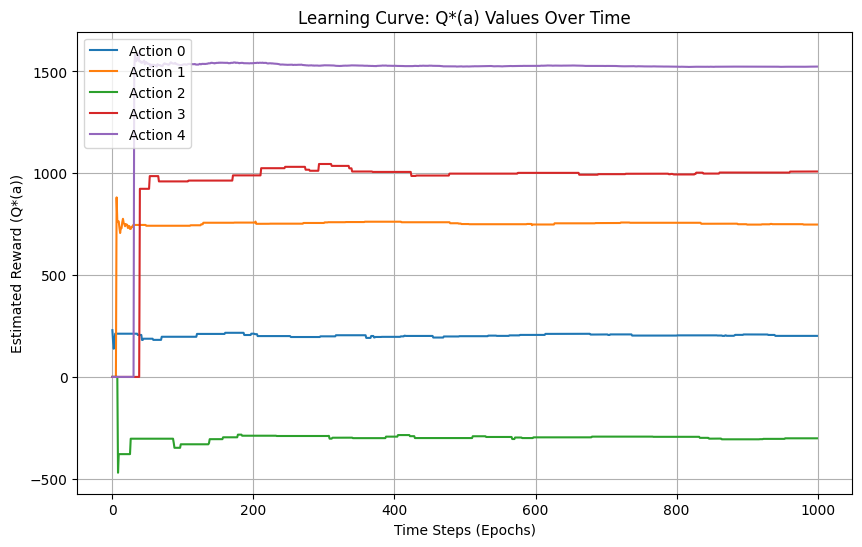

In [7]:
news_maximizer.plot_learning_curve()

We are able to observe from the above graph that our model seems to converge in less than 100 steps and maximizing the rewards for action 4
Hence our model will choose the action 4 which is mapped to certain strategy that will increase our view_counts to aligned articles

We will see another approach using the UCB method.

In [9]:
class NewsMaximizerUCB:
    def __init__(self, n_actions=5, time_steps=1000, c=2):
        self.n_actions = n_actions  # Number of strategies
        self.time_steps = time_steps  # Time steps for the simulation
        self.q_values = np.zeros(n_actions)  # Estimated value of each action
        self.action_counts = np.zeros(n_actions)  # Counts of each action
        self.aligned_mean = [300, 450, 100, 550, 800]  # This is chosen before hand that a particular action results in the resultant aligned_articles view count
        self.non_aligned_mean = [400, 150, 500, 100, 80]  # This gives the non_aligned articles view count
        # so in the above assumption we are choosing the index 4 action is the best one
        self.std_dev = 50  # Standard deviation for normal distribution
        self.q_value_history = np.zeros((time_steps, n_actions))  # To track Q-value evolution
        self.c = c  # UCB exploration parameter

    def get_reward(self, action):
        # Generate viewer counts for aligned and non-aligned articles based on normal distributions
        aligned_viewers = np.random.normal(self.aligned_mean[action], self.std_dev)
        non_aligned_viewers = np.random.normal(self.non_aligned_mean[action], self.std_dev)
        
        # Reward function: 2 * aligned_viewers - non_aligned_viewers
        reward = (2 * aligned_viewers) - non_aligned_viewers
        return reward

    def select_action(self, t):
        if t < self.n_actions:
            # In the first n time steps, select each action at least once
            return t
        
        # Compute UCB for each action
        ucb_values = self.q_values + self.c * np.sqrt(np.log(t) / (self.action_counts + 1e-5))
        return np.argmax(ucb_values)

    def update_estimates(self, action, reward):
        # Update the count for the selected action
        self.action_counts[action] += 1
        
        # Incremental update of the Q-value estimate using sample-average method
        self.q_values[action] += (1 / self.action_counts[action]) * (reward - self.q_values[action])

    def train(self):
        rewards = []
        for t in range(self.time_steps):
            action = self.select_action(t)
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
            rewards.append(reward)
            
            self.q_value_history[t] = self.q_values.copy()
        
        return rewards

    def plot_learning_curve(self):
        
        plt.figure(figsize=(10, 6))
        for action in range(self.n_actions):
            plt.plot(self.q_value_history[:, action], label=f'Action {action}')
        
        plt.title("Learning Curve: Q*(a) Values Over Time (UCB Method)")
        plt.xlabel("Time Steps (Epochs)")
        plt.ylabel("Estimated Reward (Q*(a))")
        plt.legend()
        plt.grid(True)
        plt.show()

    def get_best_action(self):
        
        return np.argmax(self.q_values)



In [10]:
news_maximizer_ucb = NewsMaximizerUCB()
rewards_ucb = news_maximizer_ucb.train()


In [11]:
best_action_ucb = news_maximizer_ucb.get_best_action()
print(f"The best action to choose after training (UCB) is: Action {best_action_ucb}")

The best action to choose after training (UCB) is: Action 4


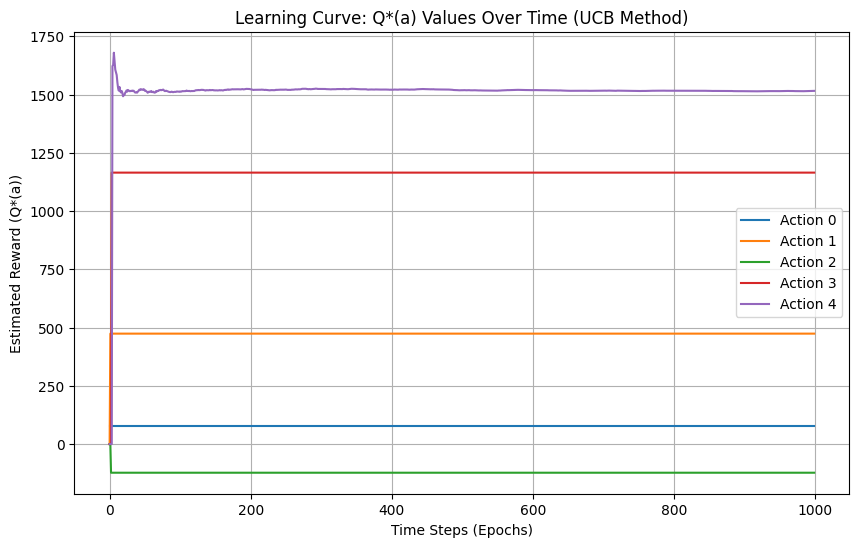

In [12]:
news_maximizer_ucb.plot_learning_curve()